# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [22]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [24]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [25]:
# Create a Beautiful Soup Object
html=browser.html
html_soup = soup(html, 'html.parser')

In [26]:
# Extract all rows of data
table= html_soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [27]:
html_soup.find('td')

<td>2</td>

In [28]:
# Create an empty list to store the scraped data
mars_data = []

# Loop through the rows of the table to create a list of rows
rows = table.find_all('tr')

for row in rows:
    data = {}  # Create an empty dictionary to store the row data
    columns = row.find_all('td')  # Find all <td> elements within the row

    if columns:  # Check if any <td> elements are found
        # Assign the text of the <td> elements to the respective keys in the data dictionary
        data['id'] = columns[0].text if len(columns) > 0 else ""
        data['terrestrial_date'] = columns[1].text if len(columns) > 1 else ""
        data['sol'] = columns[2].text if len(columns) > 2 else ""
        data['ls'] = columns[3].text if len(columns) > 3 else ""
        data['month'] = columns[4].text if len(columns) > 4 else ""
        data['min_temp'] = columns[5].text if len(columns) > 5 else ""
        data['pressure'] = columns[6].text if len(columns) > 6 else ""
        
        # Append the row data to the mars_data list
        mars_data.append(data)  



In [29]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df=pd.DataFrame(mars_data)

In [30]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [31]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [32]:
# Change data types for data analysis
df['terrestrial_date']=df['terrestrial_date'].astype('datetime64[ns]')
df['sol']=df['sol'].astype('int64')
df['ls']=df['ls'].astype('int64')
df['month']=df['month'].astype('int64')
df['min_temp']=df['min_temp'].astype('float64')
df['pressure']=df['pressure'].astype('float64')

In [33]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [34]:
# 1. How many months are there on Mars?
months=df['month'].value_counts().sort_index(ascending=True)
months

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [35]:
# 2. How many Martian days' worth of data are there?
martian_day_count=df['terrestrial_date'].count()
martian_day_count

1867

In [36]:
# 3. What is the average low temperature by month?
average_low_temp=df.groupby('month')['min_temp'].mean()
average_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

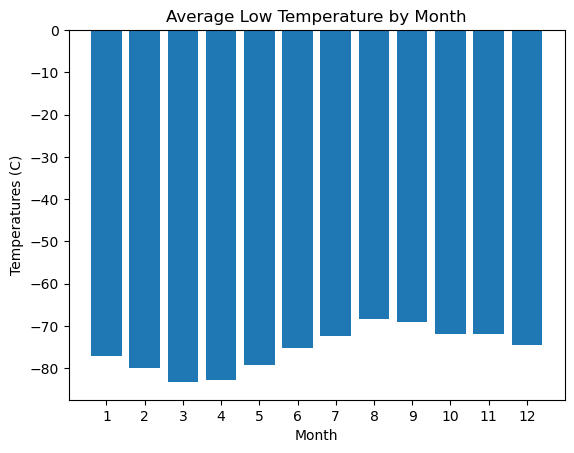

In [37]:
# Plot the average temperature by month
plt.bar(average_low_temp.index, average_low_temp)

# Set x-axis ticks to display all values
plt.xticks(average_low_temp.index)

# Set labels and title
plt.xlabel("Month")
plt.ylabel("Temperatures (C)")
plt.title('Average Low Temperature by Month')

# Display the plot
plt.show()



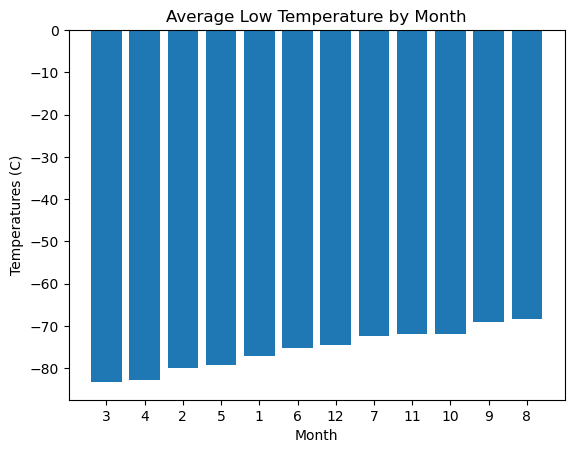

In [38]:
# Identify the coldest and hottest months in Curiosity's location
import matplotlib.pyplot as plt

# Assume you have calculated average_low_temp

# Sort average_low_temp by values in ascending order
average_low_temp_sorted = average_low_temp.sort_values()

# Create a bar plot for average low temperatures grouped by month
plt.bar(range(len(average_low_temp_sorted)), average_low_temp_sorted)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Temperatures (C)')
plt.title('Average Low Temperature by Month')

# Set x-axis ticks to display months in the order of lowest to highest temperatures
plt.xticks(range(len(average_low_temp_sorted)), average_low_temp_sorted.index)

# Display the plot
plt.show()


In [39]:
# 4. Average pressure by Martian month
average_pressure=df.groupby('month')['pressure'].mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

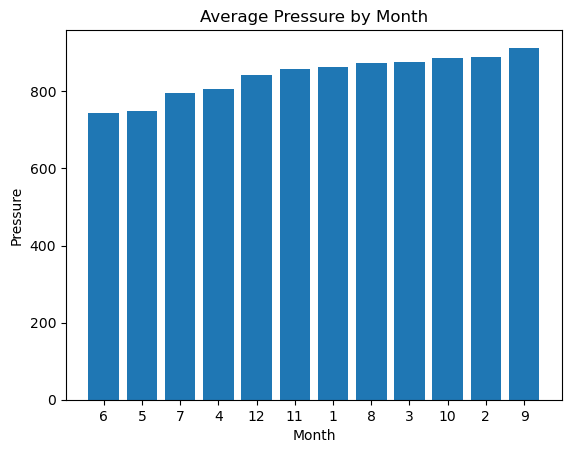

In [40]:
# Plot the average pressure by month

# Sort average_pressure by values in ascending order
average_pressure_sorted = average_pressure.sort_values()

# Create a bar plot for average pressure grouped by month
plt.bar(range(len(average_pressure_sorted)), average_pressure_sorted)

# Set x-axis ticks to display months in the order of lowest to highest pressure
plt.xticks(range(len(average_pressure_sorted)), average_pressure_sorted.index)

# Set labels and title
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.title('Average Pressure by Month')

# Display the plot
plt.show()

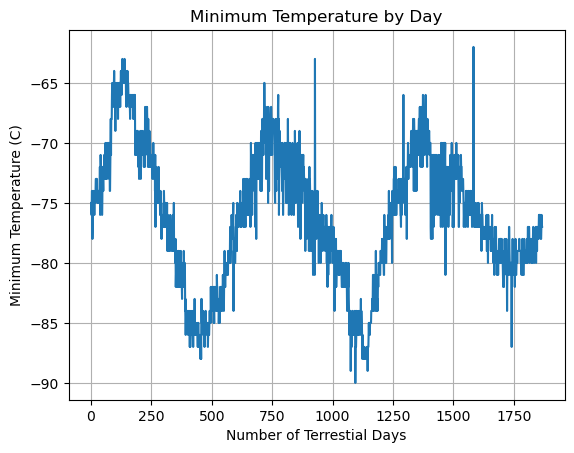

In [41]:
# 5. How many terrestrial (earth) days are there in a Martian year?
temp_by_day = df[['terrestrial_date', 'min_temp']]

# Set a new index as a count of the days
temp_by_day.index = np.arange(1, len(temp_by_day) + 1)

# Plot the minimum temperature by day using a bar plot
plt.plot(temp_by_day.index, temp_by_day['min_temp'])

# Set labels and title
plt.xlabel("Number of Terrestial Days")
plt.ylabel("Minimum Temperature (C)")
plt.title('Minimum Temperature by Day')
plt.grid(True)

# Display the plot
plt.show()


Months 7-10 are the warmest on mars with average low temps around a sweltering -65-70 C., while Months 2-5 are around in the high -70's or low -80's.




Atmospheric pressure is lowest months 4-7 and highest months 2-3 and 9-10.

Taking an average of three estimates of the distance from peak to peak (750-125=625, 1400-750=650, and 1750-1050=700), returns an estimated Martian year of 658 terrestrial days. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df.to_csv("Output/mars_data.csv", index=False, header=True)

In [42]:
browser.quit()